# __Prosty model lodowca__
### *Dorota Benari, Dominika Lewandowska*

# Wstęp

## Pierwsze modele lodowców

Pierwsze modele lodowców, które zaczęły powstawać w XVII wieku, były oparte na prostych równaniach różniczkowych i intuicji. Głównie koncentrowały się na obserwacji ich ruchu, próbie wyjaśnienia tego zjawiska oraz zbadaniu roli, jaką lodowce miały w kształtowaniu terenu.  
W dzisiejszych czasach potrzebujemy ich także, aby zrozumieć problem zmian klimatycznych i jak szybko te zmiany spowodują całkowite zniknięcie lodowców.

Przykładem mogą być zlodowaciałe obszary górskie, takie jak te na Alasce lub w Himalajach. Na Alasce, jak wskazano w artykule „Rapid Wastage of Alaska Glaciers and Their Contribution to Rising Sea Level”, od połowy XX wieku obserwowane są stopniowo przyspieszające utraty masy lodowców. Lodowce na Alasce, na skutek szybkiego topnienia, są dużym powodem podnoszenia się poziomu morza – szacuje się, że rocznie z tego powodu przybywa: $ 0.27 \pm 0.10 \, \text{mm/rok}.$ [1]

Takie zjawiska zostały również zaobserwowane w Himalajach. W tym przypadku długotrwała utrata masy lodowcowej może doprowadzić do fizycznego oderwania się języków lodowców pokrytych gruzem na dużych wysokościach. [2]


## Podstawy teoretyczne i opis zjawiska

Lodowiec to zbiór lodu utworzonego z nagromadzonego śniegu, który znajduje się powyżej strefy wiecznego śniegu. Jest to wolno płynąca masa lodu oraz największy zbiornik słodkiej wody na naszej planecie. Do ich rodziny należą lądolody, czyli masywne pokrywy lodowe, takie jak na Grenlandii (ok. $ 1.7 \, \text{mln km}^2 $) bądź na Antarktyce (ok. $ 10 \, \text{mln km}^2 $). [3] 

Lodowce i lądolody tworzą się przy temperaturze poniżej $ 0^\circ \, \text{C} $, opadach śniegu oraz płaskim terenie. Posiadają one granicę wiecznego śniegu, czyli linię, powyżej której roczna ilość opadów śniegu przewyższa jego straty spowodowane topnieniem i parowaniem. Z czasem pokrywa śnieżna pogrubia się i wzmacnia. Granica wiecznego śniegu jest zależna od temperatury.

Pod własną masą warstwa śniegu spłaszcza się i powstaje firn, a obszar, gdzie ten proces zachodzi, nazywany jest polem firnowym. Gdy ilość lodu jest już krytyczna, niższe warstwy stają się plastyczne pod ciśnieniem wyższych warstw. Lód spływa poniżej granicy wiecznego śniegu, a następnie tworzy się jęzor lodowcowy. Gdy taki jęzor spłynie w dół doliny V-kształtnej, zmieni ją w U-kształtną. W miejscu pola firnowego powstanie cyrk lodowcowy.  

Takie zlodowacenia miały wielki wpływ na rzeźbę terenu, np. w Polsce. [4]

# Prosty model lodowca i implementacje numeryczne

W tej części skupimy się na opisaniu wpływu topnienia lodowca na podnoszenie się poziomu morza. Opracowałyśmy uproszczony model matematyczny, bazujący na kilku założeniach i uproszczeniach na podstawie dostępnych danych.

## Założenia modelu

### Lodowiec jako prostopadłościan

Zakładamy, że rozważany lodowiec ma kształt prostopadłościanu i dryfuje spokojnie na Oceanie Arktycznym. 
Objętość początkowa lodowca $V(t=0)$ jest proporcjonalna do jego powierzchni podstawy $A$ i wysokości $h$:
$$
V(t) = A(t)h(t).
$$

### Zmiana powierzchni $A(t)$ i $h(t)$

Zakładamy, że powierzchnia lodowca $A(t)$ oraz $h(t)$ zmieniają się zgodnie z zależnościami geometrycznymi:

1. Wysokość lodowca $h(t)$ jako funckaj objętości $V(t)$:

$$
h(t)=h_0\left(\frac{V(t)}{V_0}\right)^\frac{1}{3}.
$$

2. Powierzchnia lodowca $A(t)$ jako funkcja wysokości $h(t)$:

$$
A(t)=A_0\left(\frac{h(t)}{h_0}\right)^2.
$$

### Temperatura i topnienie lodowca w czasie $t$

Z załączonego _wykresu 1._ (wykres pochodzi z analizy temperatur powierzchni Ziemi wykonanej przez zespół GISTEMP [5].) widać, że od około 1965 roku temperatura rośnie niemal liniowo. Dzięki kalkulatorowi GeoGebra [6] zaznaczyłyśmy przybliżoną funkcję liniową zaznaczoną zielonym kolorem na _wykresie 2_, która opisuje tempo rośnięcia średniej temperatury na świecie wyrażone wzorem:

$$
T(t)=T_0+\frac{1}{2}t.
$$

Dlatego zakładamy dla uproszczenia, że topnienie lodowca zależy liniowo od temperatury w czasie.  
Pandto zakładamy, że topnienie lodowca jest proporcjonale do powierzchni lodowca $A$. Większa powierzchnia lodowca wystawiona na działanie ciepła oznacza większe tempo topnienia. 

<p style="font-size: 14px; color: gray; font-style: italic;text-align:center">Wykres 1:</p>
<p style="font-size: 14px; color: gray; font-style: italic;text-align:center">&bdquo;Średnia globalna temperatura na podstawie danych z lądu i oceanów&rdquo;</p>
<img src="https://data.giss.nasa.gov/gistemp/graphs_v4/graph_data/Global_Mean_Estimates_based_on_Land_and_Ocean_Data/graph.png" class="bg-primary" width="600px" style="box-shadow: 3px 3px 3px gray;">



### Wzrost poziomu morza $y(t)$


Cała woda z topniejącego lodowca wpływa do morza i powoduje wzrost poziomu wody. Tę zmianę opisuje wzór:

$$
y(t) = \frac{\Delta V(t)}{A_{\text{oceanów}}},
$$

gdzie $A_{\text{oceanów}}$ to powierzchnia oceanów, a $\Delta V(t)$ to zmiana objętości lodowca.


## Tworzenie modelu

### Zmiana objętości lodowca w czasie


Po uwzględnieniu wszystkich założeń otrzymujemy równanie różniczkowe opisujące zmiane objętości lodowca w czasie:

$$
\frac{dV(t)}{dt}=-\alpha A_0\left(\frac{h(t)}{h_0}\right)^2(T_0+\frac{1}{2}t-T_0), 
$$

gdzie $\alpha$ to współczynnik proporcjonalności opisujący szybkość topnienia lodowca w jednostce czasu. W dalszej części zakładamy dla niej hipotetyczną wartość $\alpha = 0.01 \, \frac{\text{km}^3}{\text{°C}\text{rok}}$. Zakładamy również, że $t$ jest wyrażone w latach.  



### Parametry Modelu


### Początkowe warunki wykorzytywane później w obliczeniach i algorytmach:
- $V_0=3000000 km^3$, początkowa objętość lodowca.
- $A_0=900000 km^2$, początkowa powierzchnia podstawy lodowca.
- $H_0=4000 m$, początkowa wysokość lodowca.
- $T_0 = 1^\circ \text{C}$, przybliżona średnia temperatura na ten rok odczytana z _wykresu 1_.
- $\alpha = 0.01 \, \frac{\text{km}^3}{\text{°C} \cdot \text{rok}}$
- $A_{\text{oceanów}}= 361$ mln $km^2$, powierzchnia oceanów.


# Metody rozwiązywania modelu

## Metoda analityczna

### Rozwiązanie równania różniczkowego

Rozważamy równanie różniczkowe:

$$
\frac{dV(t)}{dt}=-\alpha A_0\left(\frac{h_0}{h(t)}\right)^2\frac{1}{2}t.
$$

Zakładamy, że wysokość lodowca $h(t)$ zmienia się zgodnie z zależnością:

$$
h(t) =h_0\left(\frac{V(t)}{V_0}\right)^{1/3},
$$

co oznacza:

$$
\left(\frac{h_0}{h(t)}\right)^2=\left(\frac{V_0}{V(t)}\right)^{2/3}.
$$

Podstawiając to do równania, otrzymujemy:

$$
\frac{dV(t)}{dt}= -\alpha A_0\left(\frac{V_0}{V(t)}\right)^{2/3} \frac{1}{2}t.
$$

Przekształcamy równanie do postaci umożliwiającej rozdzielenie zmiennych:

$$
\frac{dV(t)}{\left(V(t)\right)^{2/3}}=-\frac{\alpha A_0}{V_0^{2/3}}\frac{1}{2}t \, dt.
$$

Dzielimy obie strony i całkujemy.  

Obliczamy całkę po lewej stronie:

$$
\int V(t)^{-2/3} \, dV(t)=\int V^{-2/3} \,dV=3V^{1/3}.
$$

Obliczamy całkę po prawej stronie:

$$
-\frac{\alpha A_0}{V_0^{2/3}}\frac{1}{2} \int t \, dt=-\frac{\alpha A_0}{2V_0^{2/3}}\frac{t^2}{2}=-\frac{\alpha A_0}{4V_0^{2/3}}t^2.
$$

Scałkowane równanie ma postać:

$$
3V(t)^{1/3}=-\frac{\alpha A_0}{4V_0^{2/3}}t^2+C,
$$

gdzie $C$ jest stałą całkowania.  
Wyznaczamy stałą całkowania $C$.  
Dla $t = 0$ mamy $V(0) = V_0$. Podstawiamy:

$$
3V_0^{1/3}=C.
$$

Zatem:

$$
C=3V_0^{1/3}.
$$

Ostatecznie równanie na objętość $V(t)$ w czasie to:

$$
3V(t)^{1/3}=3V_0^{1/3}-\frac{\alpha A_0}{4V_0^{2/3}}t^2.
$$

Podzielmy obie strony przez 3 i podnieśmy do potęgi trzeciej, aby wyznaczyć $ V(t)$:

$$
V(t)=\left[V_0^{1/3}-\frac{\alpha A_0}{12V_0^{2/3}}t^2\right]^3.
$$


## Metoda Eulera

Przedstawiona pierwotnie przez Leonharda Eulera w 1768 roku w pozycji pt. 'Kształcenie w rachunku różniczkowym', metoda opiera się na rozwiązywaniu równań różniczkowych poprzez interpretację geometryczną.

### Metoda podstawowa

Zapisujemy równanie modelu w postaci:
$$
\frac{dV(t)}{dt}= f(t,V(t)).
$$

Aby otrzymać rozwiązanie numeryczne przybliżamy pochodną:

$$
\frac{dV(t)}{dt}\approx\frac{V(t+h)-V(t)}{h}.
$$

Rozwiązujemy dla $V(t+h)$:

$$
V(t+h)\approx V(t)+h\frac{dV(t)}{dt}.
$$

Podstawiamy wcześniejsze założenie:

$$
V(t+h)\approx V(t)+h f(t_n,V_n).
$$

W ten sposób otrzymujemy iterację:

$$
V_{n+1}=V_{n}+h f(t_n,V_n).
$$[7]

Gdzie:
- $f(t_n,V_n)$ jest prawą stroną równania różniczkowego,
- $h$ to krok czasowy,
- $t_n= t_0+ n  h$.

## Metoda Runge-Kutty

Metoda numeryczna, służąca do rozwiązywania równań różniczkowych zwyczajnych iteracyjnie. Opracowanie jej jest datowane około roku 1900, przez Carla Rungego i Martina Kuttę, niemieckich matematyków.  
W dzisiejszych czasach metoda Runge-Kutty zyskała szerokie zastosowanie jako efektywne narzędzie, powszechne dostępne w komercyjnych oprogramowaniach.

### Metoda Runge-Kutty czwartego rzędu (RK4)

Zapisujemy równanie modelu jako:

$$
\frac{dV(t)}{dt}=f(t, V(t))
$$

Formuła Runge-Kutty obejmuje średnią ważoną wartości $f(t,V(t))$ w różnych punktach przedziału $t_{\text{n}} ≤ t ≤ t_{\text{n+1}}$. Jest ona dana przez wzór:

$$
V_{n+1}= V_n+h\left(\frac{k_1+2k_2+2k_3+k_4}{6}\right),
$$

gdzie:

$$
k_1=f(t_n,V_n), 
$$

$$
k_2=f(t_n+\frac{1}{2}h,V_n+\frac{1}{2}hk_1),
$$

$$
k_3=f(t_n+\frac{1}{2}h,V_n+\frac{1}{2}hk_2),
$$

$$
k_4=f(t_n+h,V_n+hk_3).
$$
  
Każdy kolejny współczynnik $(k_1, k_2, k_3, k_4)$ uwzględnia coraz bardziej złożone przybliżenie pochodnej.

Naturalnie, metoda Runge-Kutty, jest nieco bardziej złożona niż wzory omówione wcześniej. Nie ma to jednak dużego znaczenia,
ponieważ napisanie programu komputerowego do implementacji tej metody nie należy do najtrudniejszych, a algorytm ma podobną strukturę, co ten w przypadku metody Eulera. [8]  


# Porównianie i implementacja metod numerycznych i metody analitycznej

Poniżej przedstawiamy implementację numeryczną (Euler, Runge-Kutta 4) i analityczną naszego modelu.

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from ipywidgets import interactive
import ipywidgets as widgets

# parametry
V_0= 3000000  # km^3, początkowa objętość lodowca
A_0= 900000   # km^2, początkowa powierzchnia lodowca
h_0= 4000     # m, początkowa wysokość lodowca
T_0= 1        # °C, początkowa temperatura
alpha= 0.01   #stała
A_ocean= 361.9e6  # km^2, powierzchnia oceanów
time_steps= 60  #liczba kroków ( w latach)

#temp w czasie
def T(t):
    return T_0+0.5*t

#dV/dt
def dV_dt(V, A, T_current):
    return -alpha*A*T_current

#metoda Eulera
def euler(V, A, h_l, time_steps, dt):
    volumes, sea_level, times= [V], [0], [0]
    for step in range(1, int(time_steps/dt)+1):
        t= step*dt
        T_current=T(t)

        dV= dV_dt(V, A, T_current)*dt
        V_new= max(V+ dV, 0)

        if V_new > 0:
            h_l= h_0* (V_new/ V_0)**(1/ 3)
            A= A_0* (h_l/ h_0)**2
        else:
            h_l, A = 0, 0

        h_sea= (V_0- V_new)/ A_ocean
        volumes.append(V_new)
        sea_level.append(h_sea)
        times.append(t)
        V= V_new

    return times, volumes, sea_level

#Runge-Kutta
def runge_kutta(V, A, h_l, time_steps, dt):
    volumes, sea_level, times= [V], [0], [0]
    for step in range(1, int(time_steps/dt)+1):
        t=step*dt
        T_current=T(t)

        k1 = dV_dt(V, A, T_current)
        V1 = max(V + 0.5 * dt * k1, 0)
        h1 = h_0 * (V1 / V_0)**(1 / 3)
        A1 = A_0 * (h1 / h_0)**2

        k2 = dV_dt(V1, A1, T_current)
        V2 = max(V + 0.5 * dt * k2, 0)
        h2 = h_0 * (V2 / V_0)**(1 / 3)
        A2 = A_0 * (h2 / h_0)**2

        k3 = dV_dt(V2, A2, T_current)
        V3 = max(V + dt * k3, 0)
        h3 = h_0 * (V3 / V_0)**(1 / 3)
        A3 = A_0 * (h3 / h_0)**2

        k4 = dV_dt(V3, A3, T_current)
        V_new = max(V + (dt / 6) * (k1 + 2 * k2 + 2 * k3 + k4), 0)
        V = V_new

        if V>0:
            h_l=h_0*(V/V_0)**(1/3)
            A=A_0*(h_l/h_0)**2
        else:
            h_l,A=0,0

        h_sea= (V_0- V)/ A_ocean
        volumes.append(V)
        sea_level.append(h_sea)
        times.append(t)
    return times, volumes, sea_level

#analityczna
def analytical(t, V_0, A_0, alpha):
    term= V_0**(1/3)-(alpha*A_0/(12*V_0**(2/3)))*t**2
    return np.maximum(term**3, 0)

#wykresy 3 i 4
def plot(dt):
    #obliczenia
    times_euler, volumes_euler, sea_level_euler = euler(V_0, A_0, h_0, time_steps, dt)
    times_rk, volumes_rk, sea_level_rk = runge_kutta(V_0, A_0, h_0, time_steps, dt)
    times_analytical = np.linspace(0, time_steps, 1000)
    volumes_analytical = analytical(times_analytical, V_0, A_0, alpha)
    sea_level_analytical=(V_0-volumes_analytical)/A_ocean*1000  # w mm

    plt.figure(figsize=(12, 10))

    # Wykres 3: Objętość lodowca
    plt.subplot(3, 1, 1)
    plt.plot(times_rk, volumes_rk, label="Runge-Kutta", color="blue")
    plt.plot(times_euler, volumes_euler, label="Euler", color="green")
    plt.plot(times_analytical, volumes_analytical, label="Analityczne", color="red")
    plt.xlabel("Czas (lata)")
    plt.ylabel("Objętość ($km^3$)")
    plt.title("Wykres 3. Zmiana objętości lodowca w czasie")
    plt.legend()
    plt.grid()

    # Wykres 4: Wzrost poziomu morza
    plt.subplot(3, 1, 2)
    plt.plot(times_rk, [h * 1000 for h in sea_level_rk], label="Runge-Kutta", color="blue")
    plt.plot(times_euler, [h * 1000 for h in sea_level_euler], label="Euler", color="green")
    plt.plot(times_analytical, sea_level_analytical, label="Analityczne", color="red")
    plt.xlabel("Czas (lata)")
    plt.ylabel("Wzrost poziomu morza (mm)")
    plt.title("Wykres 4. Wzrost poziomu morza spowodowany topnieniem lodowca")
    plt.legend()
    plt.grid()

    plt.tight_layout()
    plt.show()

interactive_plot = interactive(plot, dt=widgets.FloatSlider(value=10, min=1, max=10, step=1, description="Krok czasowy (dt):"))
output = interactive_plot.children[-1]
output.layout.height = '600px' 
interactive_plot


Korzystając z suwaka, możemy zauważyć na wspomnianych _wykresach 3_ i _4_, że wszystkie metody numeryczne dają różne wyniki dla różnych kroków czasowych.
Metoda Eulera, przy większych krokach czasowych, wydaje się być najmniej dokładna spośród wszystkich metod.

Potwierdźmy nasze obserwacje, obliczając błąd względny dla metody Eulera i Runge-Kutty. Przyjmujemy, że rozwiązanie analityczne jest naszym wynikiem oczekiwanym.

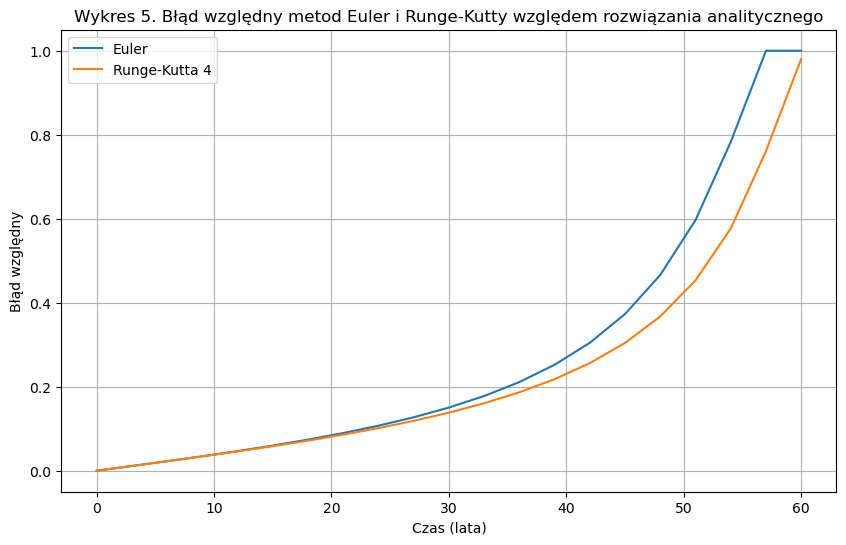

In [ ]:
times_E, y_E, sea_level_E= results_E
times_RK4, y_RK4, sea_level_RK4=results_RK4

def analytical(t, V_0, A_0, alpha):
    term= V_0**(1/3)-(alpha*A_0/(12*V_0**(2/3)))*t**2
    return max(term**3, 0)

error_E=[]
error_RK4=[]
index=[]

for i in range(0, len(times_E), 3):
    t= times_E[i] 
    y= V_analytical(t, V_0, A_0, alpha)
    error= abs(y_E[i]- y)/abs(y)
    error_E.append(error)

    error_rk4 = abs(y_RK4[i]- y)/abs(y)
    error_RK4.append(error_rk4)
    index.append(t)

plt.figure(figsize=(10, 6))
plt.plot(index, error_E, label="Euler")
plt.plot(index, error_RK4, label="Runge-Kutta 4")
plt.xlabel("Czas (lata)")
plt.ylabel("Błąd względny")
plt.title("Wykres 5. Błąd względny metod Eulera i Runge-Kutty względem rozwiązania analitycznego")
plt.legend()
plt.grid()
plt.show()


Na początku obie metody, ze względu na swoje przybliżeniowe charakterystyki, wykazują podobny błąd względny. Jednak w miarę upływu czasu błąd metody Eulera rośnie szybciej niż w przypadku metody Runge-Kutty.

Z wykresu 5 możemy potwierdzić nasze przypuszczenia. Dla modelu lodowca metoda Runge-Kutty daje wyniki najbardziej zbliżone do rozwiązania analitycznego.

# Konkluzja

Aktualne oraz przyszłe topnienie lodowców na całym globie jest poważnym problemem bezpośrednio powiązanym ze wzrostem poziomu  morza i innych akwenów oraz zagrożeniami naturalnymi. Jako, że ich model jest zależny od temperatury, są uzależnione od zmian klimatycznych. Przy przewidywanych ociepleniach atmosfery, większość z nich stopnieje w ciągu najbliższych dekad.[10]

Matematyczny model lodowca ilustruje zależność wzrostu temperatury ze zmniejszaniem się objętości lodowca oraz jednoczesnym wzrostem poziomu mórz. Parametry, takie jak początkowa objętość lodowca czy powierzchnia oceanów, pozwalają na oszacowanie skutków tych procesów. Rzeczywista dynamika może być jednak bardziej skomplikowana, ponieważ w tym modelu nie uwzględniono dynamiki przepływu wody z lodowca do oceanu, zmian prądów oceanicznych ani procesów ablacji lodowca.

O ile stworzono już wiele modeli dla pojedynczych lodowców, wciąż istnieje zapotrzebowanie na modele globalne, obejmujące wszystkie 200 000 lodowców. Takie kompleksowe modele mogłyby dostarczyć dokładniejszych przewidywań dotyczących wzrostu poziomu wód.




<p style="font-size: 14px; color: gray; font-style: italic; text-align:center">Rysunek 1:</p>
<p style="font-size: 14px; color: gray; font-style: italic;text-align:center">Występowanie lodowców na Ziemi [11]</p>
<img src="https://www.antarcticglaciers.org/wp-content/uploads/2014/11/global_glaciers_rgi_Small.jpg" class="bg-primary" width="600px">

Szacunkowo, jeśli wszystkie lodowce na świecie by stopniały, poziom morza podniósłby się o 405 metrów. [12] Jest to wystarczająca wartość, aby zalać największe archipelagi oraz przybrzeżne miasta, odbierając domy milionom ludzi. Doprowadziłoby to do powstania kolejnych problemów natury urbanistycznej i komunikacyjnej w innych miastach. Byłaby to również ogromna strata dziedzictwa kulturowego.

Topnienie lodowców jest złożonym i poważnym problemem, skutkującym wielkimi zmianami dla ludzkości. Dlatego szczególnie ważne jest, aby każdego dnia podejmować świadome decyzje dobre dla naszego klimatu. Proste działania, takie jak korzystanie z opakowań wielorazowego użytku, wybieranie transportu publicznego czy nawet gaszenie światła w nieużywanych pomieszczeniach, pomagają zmniejszyć tempo zmian klimatycznych, których już zaczynamy doświadczać.


# Bibliografia

[1] Arendt, A. A., Walsh, J. E., & Harrison, W. D. (2009). Rapid Wastage of Alaska Glaciers and Their Contribution to Rising Sea Level. 382-383.  

[2] Owen King, Duncan J. Quincey, Jonathan L. Carrivick, & Ann V. Rowan (2017) Spatial variability in mass loss of glaciers in the Everest region, central Himalayas, between 2000 and 2015. 407-409.  

[3] 2024 Encyclopædia Universalis France. Glaciers. 1-2.  

[4] Zintegrowana platforma edukacyjna, Serwis Ministerstwa Edukacji Narodowej. Jak lodowce i lądolody przekształcają powierzchnię Ziemi. Dostępne na: https://zpe.gov.pl/a/jak-lodowce-i-ladolody-przeksztalcaja-powierzchnie-ziemi/DJxXwGMA9  

[5] GISTEMP Team, 2024: GISS Surface Temperature Analysis (GISTEMP), version 4. NASA Goddard Institute for Space Studies. Dataset accessed 2024-12-28 at https://data.giss.nasa.gov/gistemp/.
Lenssen, N., G.A. Schmidt, M. Hendrickson, P. Jacobs, M. Menne, and R. Ruedy, 2024: A GISTEMPv4 observational uncertainty ensemble. J. Geophys. Res. Atmos., 129, no. 17, e2023JD040179, doi:10.1029/2023JD040179.  

[6] GeoGebra Team (2024). GeoGebra [Oprogramowanie komputerowe]. GeoGebra Institute. Dostępne na: https://www.geogebra.org.  
[7] Rosseta Code (2024). Euler Method.https://rosettacode.org/wiki/Euler_method# .  

[8] William E. Boyce, Richard C. DiPrima (2009) Elementary Differential Equations and Boundary Value Problems. 459-463.  

[9] Matthias Huss, Regine Hock (2015) A new model for global glacier change and sea-level rise. 1-2.  

[10] https://earthobservatory.nasa.gov/images/83918/the-randolph-glacier-inventory

[11] Bethan Davies (2023) Mapping the World’s Glaciers. 1-7.  